In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
def smooth(scalars, weight):
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
        
    return smoothed

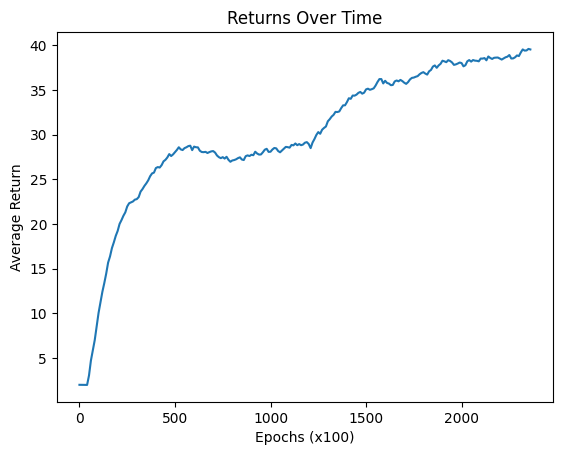

In [247]:
log_data = pd.read_csv('q1/2.csv', on_bad_lines='skip')

eval_returns = log_data['trainer/Eval_AverageReturn']
max_returns = log_data['trainer/Eval_MaxReturn']
min_returns = log_data['trainer/Eval_MinReturn']
# train_returns = log_data['trainer/Train_AverageReturn']

x_values = np.arange(0,10*len(eval_returns),10)

# plt.plot(x_values, eval_returns, 'o-', label='Evaluation Returns')
plt.plot(x_values, smooth(eval_returns, 0.9), label='Evaluation Returns')
# plt.fill_between(x_values, min_returns, max_returns, color='blue', alpha=0.1, label='Confidence Interval')

# plt.legend()
plt.title('Returns Over Time')
plt.xlabel('Epochs (x100)')
plt.ylabel('Average Return')
# plt.xticks(x_values)

plt.show()

In [132]:
def get_avg_return(dir):
    data1 = pd.read_csv(f'{dir}/1.csv', on_bad_lines='skip')['trainer/Eval_AverageReturn']
    data2 = pd.read_csv(f'{dir}/2.csv', on_bad_lines='skip')['trainer/Eval_AverageReturn']
    data3 = pd.read_csv(f'{dir}/3.csv', on_bad_lines='skip')['trainer/Eval_AverageReturn']

    return np.mean([data1, data2, data3], axis=0)


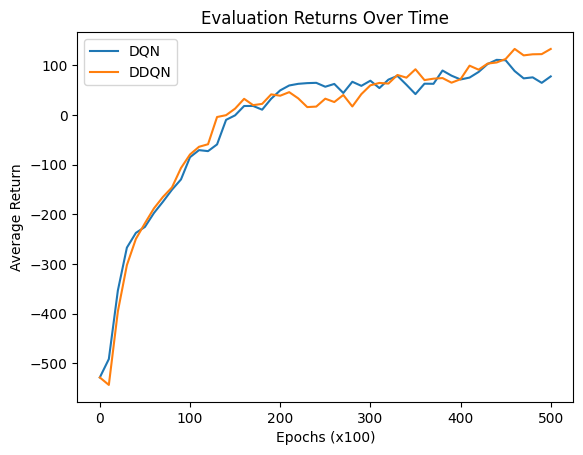

In [194]:
data1 = get_avg_return('q2/dqn')
data2 = get_avg_return('q2/ddqn')

x_values = np.arange(0,10*(len(data1)),10)

plt.plot(x_values, smooth(data1,0.6), label='DQN')
plt.plot(x_values, smooth(data2,0.6), label='DDQN')

plt.legend()
plt.title('Evaluation Returns Over Time')
plt.xlabel('Epochs (x100)')
plt.ylabel('Average Return')
# plt.xticks(x_values)

plt.show()

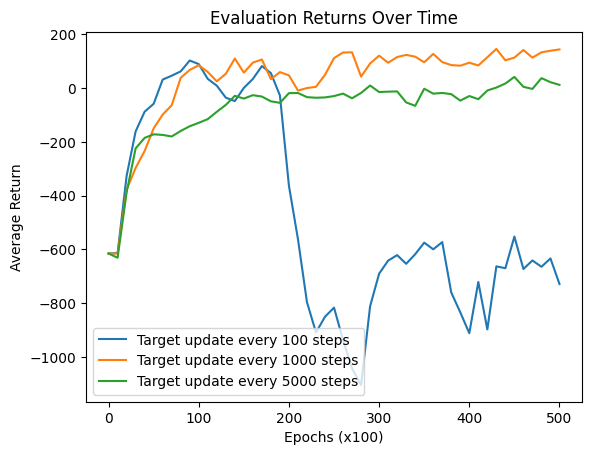

In [184]:
data1 = pd.read_csv('q3/100.csv', on_bad_lines='skip')['trainer/Eval_AverageReturn']
data2 = pd.read_csv('q3/1000.csv', on_bad_lines='skip')['trainer/Eval_AverageReturn']
data3 = pd.read_csv('q3/5000.csv', on_bad_lines='skip')['trainer/Eval_AverageReturn']

x_values = np.arange(0,10*(len(data2)),10)

plt.plot(x_values, smooth(data1,0.5), label='Target update every 100 steps')
plt.plot(x_values, smooth(data2,0.5), label='Target update every 1000 steps')
plt.plot(x_values, smooth(data3,0.5), label='Target update every 5000 steps')

plt.legend()
plt.title('Evaluation Returns Over Time')
plt.xlabel('Epochs (x100)')
plt.ylabel('Average Return')
# plt.xticks(x_values)

plt.show()

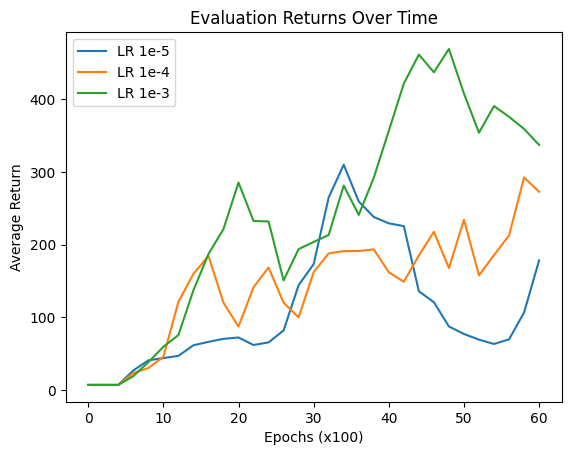

In [168]:
data1 = get_avg_return('q4/lr-5')
data2 = get_avg_return('q4/lr-4')
data3 = get_avg_return('q4/lr-3')

x_values = np.arange(0,2*(len(data1)),2)

plt.plot(x_values, smooth(data1,0.5), label='LR 1e-5')
plt.plot(x_values, smooth(data2,0.5), label='LR 1e-4')
plt.plot(x_values, smooth(data3,0.5), label='LR 1e-3')

plt.legend()
plt.title('Evaluation Returns Over Time')
plt.xlabel('Epochs (x100)')
plt.ylabel('Average Return')
# plt.xticks(x_values)

plt.show()

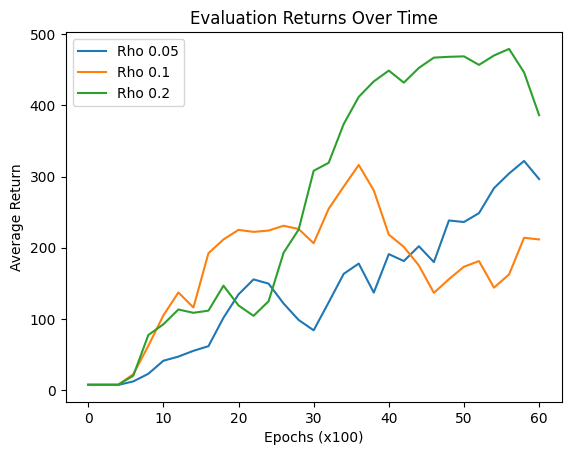

In [164]:
data1 = get_avg_return('q6/r0.05')
data2 = get_avg_return('q6/r0.1')
data3 = get_avg_return('q6/r0.2')

x_values = np.arange(0,2*(len(data1)),2)

plt.plot(x_values, smooth(data1,0.7), label='Rho 0.05')
plt.plot(x_values, smooth(data2,0.7), label='Rho 0.1')
plt.plot(x_values, smooth(data3,0.7), label='Rho 0.2')

plt.legend()
plt.title('Evaluation Returns Over Time')
plt.xlabel('Epochs (x100)')
plt.ylabel('Average Return')
# plt.xticks(x_values)

plt.show()

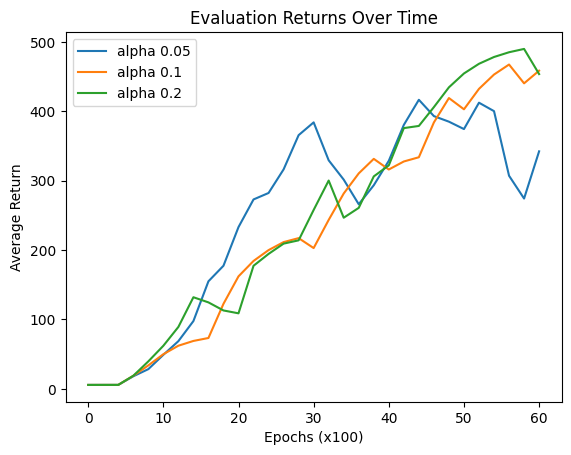

In [160]:
data1 = get_avg_return('q8/a0.05')
data2 = get_avg_return('q8/a0.1')
data3 = get_avg_return('q8/a0.2')

x_values = np.arange(0,2*(len(data1)),2)

plt.plot(x_values, smooth(data1,0.7), label='alpha 0.05')
plt.plot(x_values, smooth(data2,0.7), label='alpha 0.1')
plt.plot(x_values, smooth(data3,0.7), label='alpha 0.2')

plt.legend()
plt.title('Evaluation Returns Over Time')
plt.xlabel('Epochs (x100)')
plt.ylabel('Average Return')
# plt.xticks(x_values)

plt.show()

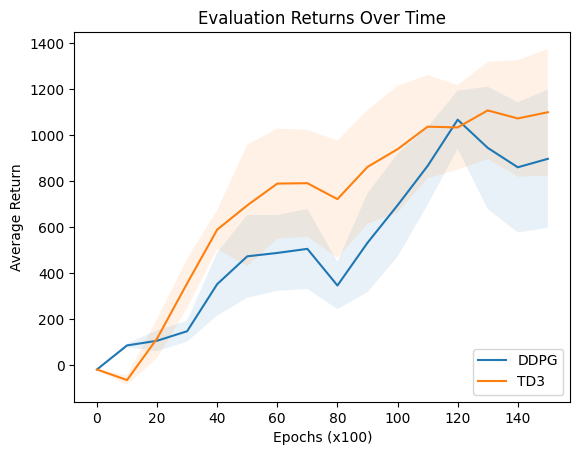

In [248]:


log_data = pd.read_csv('q5/1.csv', on_bad_lines='skip')

eval_returns = log_data['trainer/Eval_AverageReturn']
# max_returns = log_data['trainer/Eval_MaxReturn']
# min_returns = log_data['trainer/Eval_MinReturn']
max_returns = log_data['trainer/Eval_StdReturn']
min_returns = log_data['trainer/Eval_StdReturn']
# train_returns = log_data['trainer/Train_AverageReturn']

x_values = np.arange(0,10*len(eval_returns),10)

# plt.plot(x_values, eval_returns, 'o-', label='Evaluation Returns')
plt.plot(x_values, smooth(eval_returns, 0.3), label='DDPG')
plt.fill_between(x_values, smooth(eval_returns-min_returns, 0.3), smooth(eval_returns+max_returns, 0.3), alpha=0.1)

# log_data = pd.read_csv('q9/2.csv', on_bad_lines='skip')

# eval_returns = log_data['trainer/Eval_AverageReturn']
# # max_returns = log_data['trainer/Eval_MaxReturn']
# # min_returns = log_data['trainer/Eval_MinReturn']
# max_returns = log_data['trainer/Eval_StdReturn']
# min_returns = log_data['trainer/Eval_StdReturn']
# # train_returns = log_data['trainer/Train_AverageReturn']

# x_values = np.arange(0,10*len(eval_returns),10)

# # plt.plot(x_values, eval_returns, 'o-', label='Evaluation Returns')
# plt.plot(x_values, smooth(eval_returns, 0.3), label='SAC')
# plt.fill_between(x_values, smooth(eval_returns-min_returns, 0.3), smooth(eval_returns+max_returns, 0.3), alpha=0.1)

log_data = pd.read_csv('q7/1.csv', on_bad_lines='skip')

eval_returns = log_data['trainer/Eval_AverageReturn']
# max_returns = log_data['trainer/Eval_MaxReturn']
# min_returns = log_data['trainer/Eval_MinReturn']
max_returns = log_data['trainer/Eval_StdReturn']
min_returns = log_data['trainer/Eval_StdReturn']
# train_returns = log_data['trainer/Train_AverageReturn']

x_values = np.arange(0,10*len(eval_returns),10)

# plt.plot(x_values, eval_returns, 'o-', label='Evaluation Returns')
plt.plot(x_values, smooth(eval_returns, 0.3), label='TD3')
plt.fill_between(x_values, smooth(eval_returns-min_returns, 0.3), smooth(eval_returns+max_returns, 0.3), alpha=0.1)



plt.legend(loc='lower right')
plt.title('Evaluation Returns Over Time')
plt.xlabel('Epochs (x100)')
plt.ylabel('Average Return')
# plt.xticks(x_values)

plt.show()